In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Import Date Column into Pandas Dataframe As Datetime Object
To import the dates as a datetime object, you can use the parse_dates parameter of the pd.read_csv() function that allows you to indicate that a particular column should be converted to a datetime object:

parse_dates = ['date_column']

If you have a single column that contain dates in your data, you can also set dates as the index for the dataframe using the index_col parameter:

index_col = ['date_column']

You will use this index in later lessons to allow you to quickly summarize and aggregate your data by date.

Now you can recreate the dataframe using the parameter parse_datesto convert the dates from strings to datetime values and index_col to set the index of the dataframe to the datetime values.

In [2]:
data = pd.read_csv("dataset/case_time_series.csv",parse_dates=['Date_YMD'], index_col=['Date_YMD'])

In [3]:
data.tail()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
Date_YMD,,,,,,,
2021-10-27,27 October 2021,16351,34231030,17077,33606620,734,455828
2021-10-28,28 October 2021,14307,34245337,13189,33619809,805,456633
2021-10-29,29 October 2021,14215,34259552,13549,33633358,551,457184
2021-10-30,30 October 2021,12940,34272492,14672,33648030,445,457629
2021-10-31,31 October 2021,12907,34285399,13152,33661182,251,457880


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 641 entries, 2020-01-30 to 2021-10-31
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             641 non-null    object
 1   Daily Confirmed  641 non-null    int64 
 2   Total Confirmed  641 non-null    int64 
 3   Daily Recovered  641 non-null    int64 
 4   Total Recovered  641 non-null    int64 
 5   Daily Deceased   641 non-null    int64 
 6   Total Deceased   641 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 40.1+ KB


In [5]:
DC = data["Daily Confirmed"] #Stores Daily Confirmed
TC = data["Total Confirmed"]
DR = data["Daily Recovered"] #Stores Daily Recovered
TR = data["Total Recovered"]
DD = data["Daily Deceased"] #Stores Daily Deceased
TD = data["Total Deceased"]

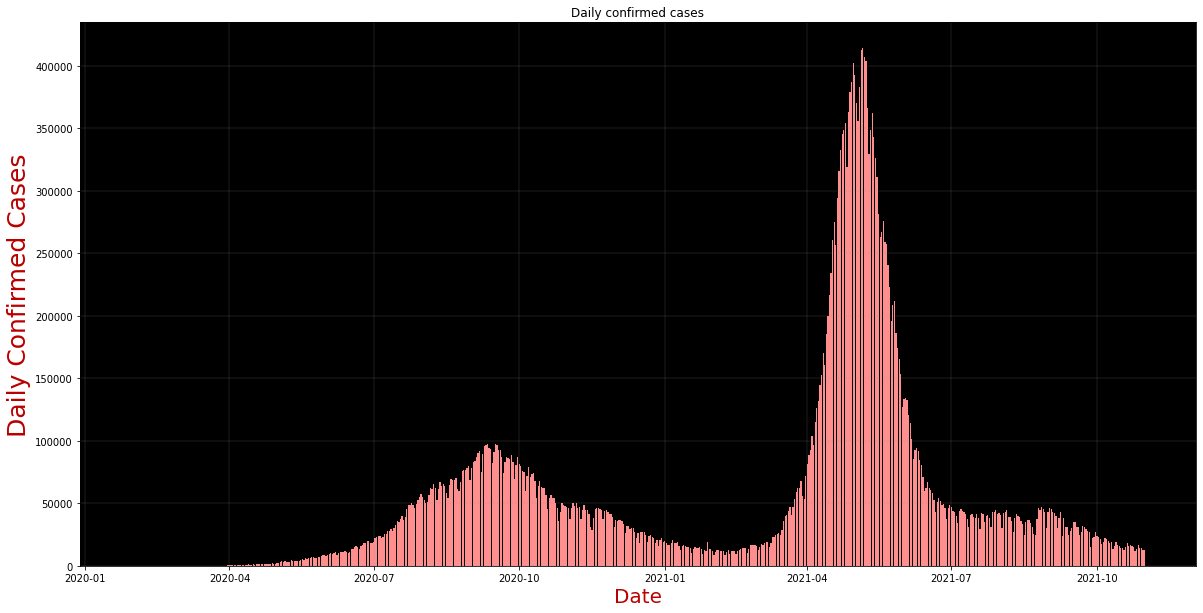

In [6]:
x = data.index
y = DC

plt.figure(figsize=(20,10))
ax1 = plt.axes()

ax1.grid(linewidth=0.2, color='#8f8f8f') 
ax1.set_facecolor("black")
ax1.set_xlabel('Date',size=20, color='#ba0000')
ax1.set_ylabel('Daily Confirmed Cases', size=25,color='#ba0000')
ax1.bar(x, y, color='#ff8f8f', linewidth=0.1)
plt.title("Daily confirmed cases")

plt.show()

In [7]:
x = data.index
y = TC


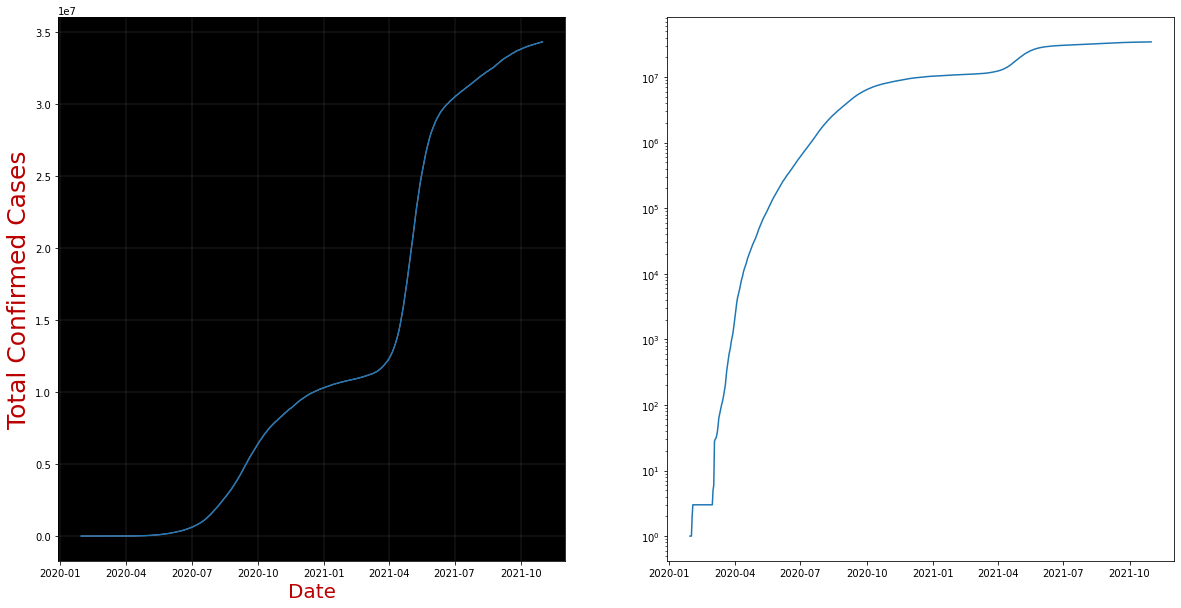

In [8]:
fig, (ax2, ax3) = plt.subplots(1, 2, figsize=(20,10))

ax2.grid(linewidth=0.2, color='#8f8f8f') 
ax2.set_facecolor("black")
ax2.set_xlabel('Date',size=20, color='#ba0000')
ax2.set_ylabel('Total Confirmed Cases', size=25,color='#ba0000')
ax2.plot(x, y, color='#ff8f8f', linewidth=1)

ax2.plot(x, y)

ax3.set_yscale("log")
ax3.plot(x, y)
plt.show()

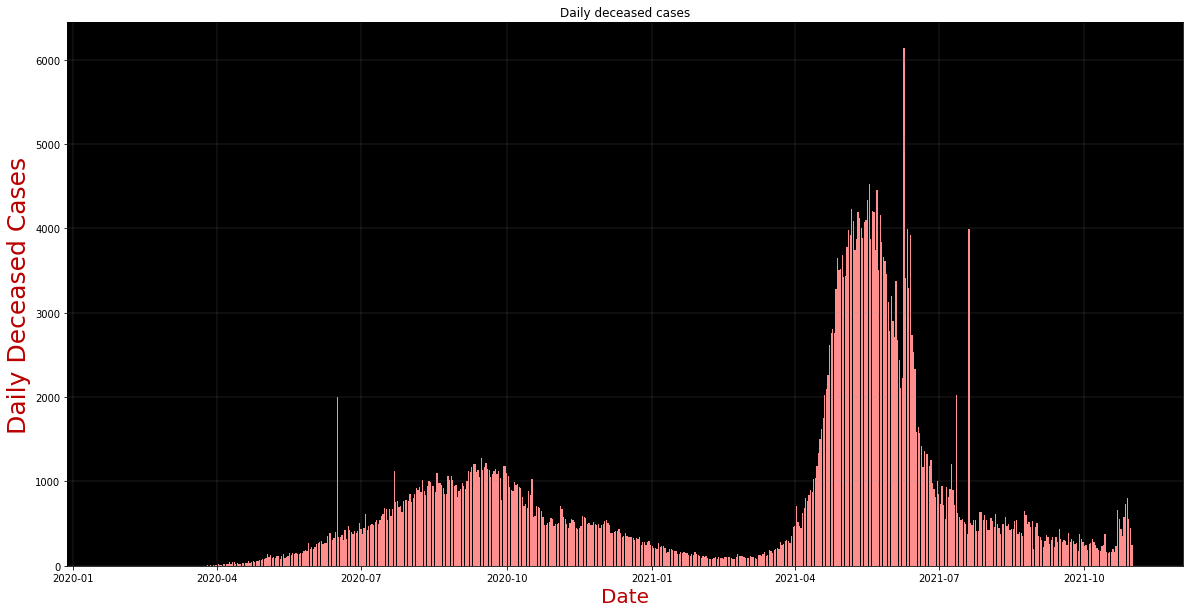

In [9]:
x = data.index
y = DD

plt.figure(figsize=(20,10))
ax4 = plt.axes()

ax4.grid(linewidth=0.2, color='#8f8f8f') 
ax4.set_facecolor("black")
ax4.set_xlabel('Date',size=20, color='#ba0000')
ax4.set_ylabel('Daily Deceased Cases', size=25,color='#ba0000')
ax4.bar(x, y, color='#ff8f8f')
plt.title("Daily deceased cases")

plt.show()

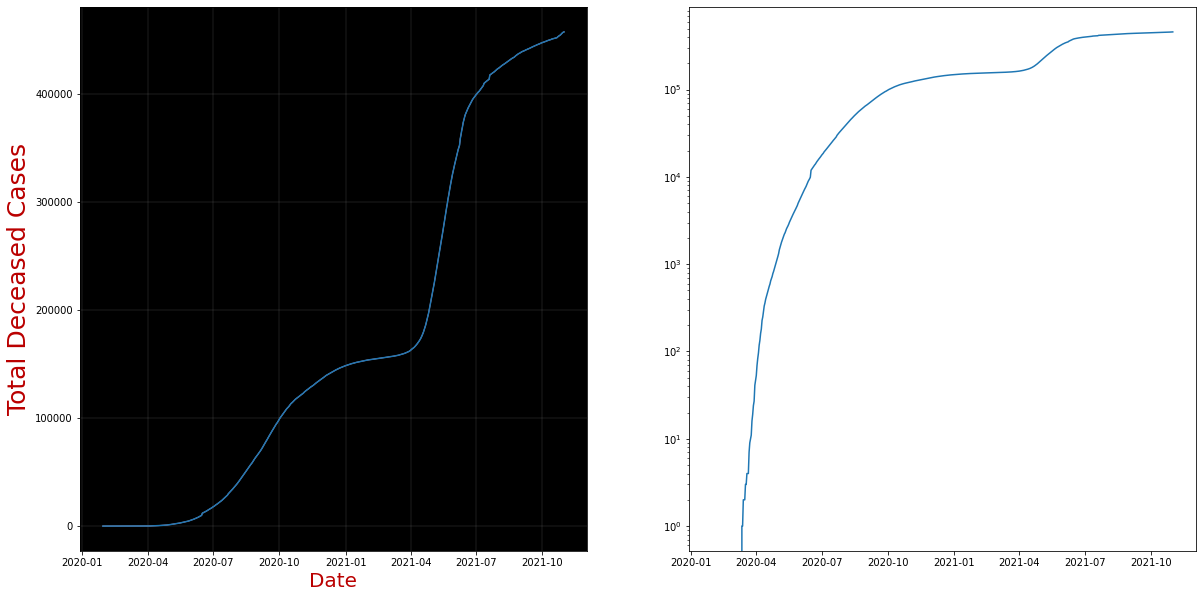

In [10]:
x = data.index
y = TD

fig, (ax4, ax5) = plt.subplots(1, 2, figsize=(20,10))

ax4.grid(linewidth=0.2, color='#8f8f8f') 
ax4.set_facecolor("black")
ax4.set_xlabel('Date',size=20, color='#ba0000')
ax4.set_ylabel('Total Deceased Cases', size=25,color='#ba0000')
ax4.plot(x, y, color='#ff8f8f', linewidth=1)

ax4.plot(x, y)

ax5.set_yscale("log")
ax5.plot(x, y)
plt.show()

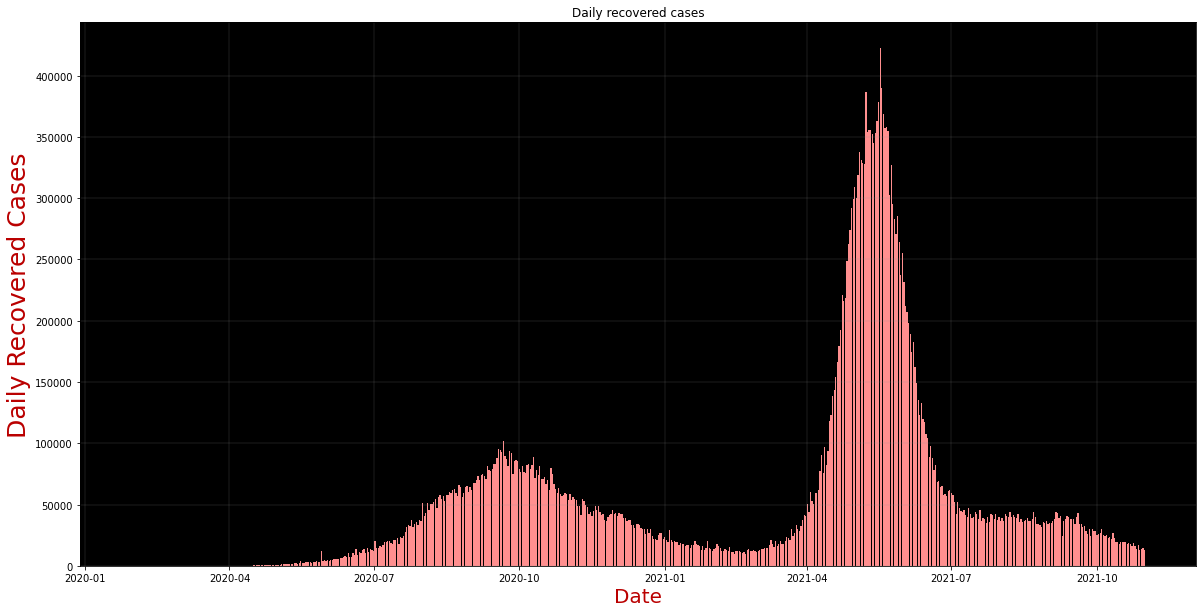

In [11]:
x = data.index
y = DR

plt.figure(figsize=(20,10))
ax6 = plt.axes()

ax6.grid(linewidth=0.2, color='#8f8f8f') 
ax6.set_facecolor("black")
ax6.set_xlabel('Date',size=20, color='#ba0000')
ax6.set_ylabel('Daily Recovered Cases', size=25,color='#ba0000')
ax6.bar(x, y, color='#ff8f8f')
plt.title("Daily recovered cases")

plt.show()

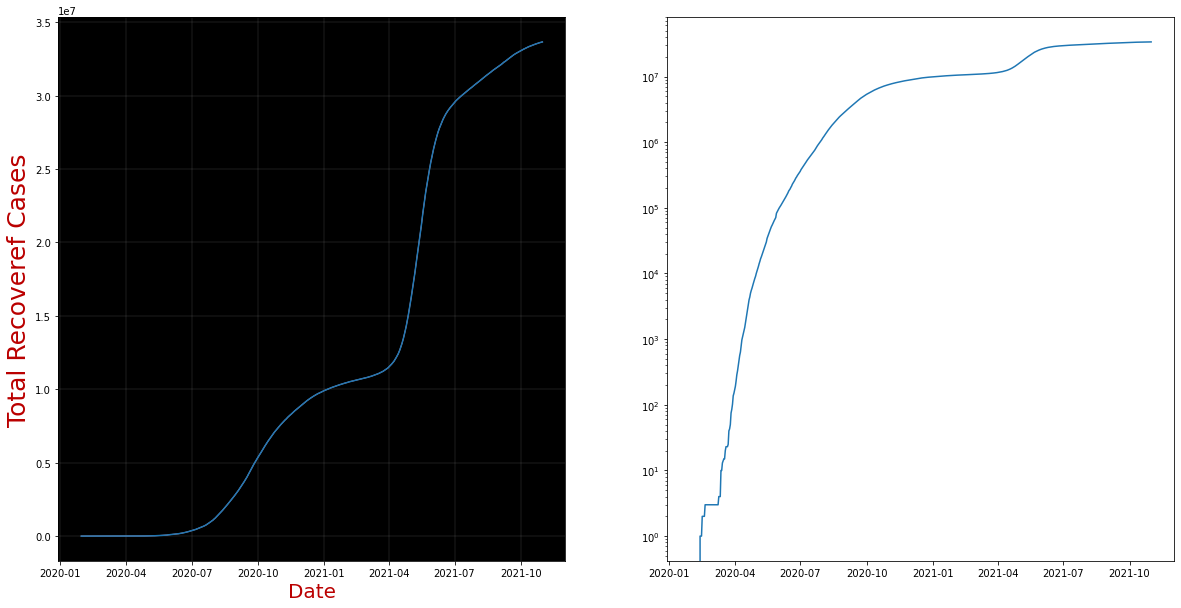

In [12]:
x = data.index
y = TR

fig, (ax7, ax8) = plt.subplots(1, 2, figsize=(20,10))

ax7.grid(linewidth=0.2, color='#8f8f8f') 
ax7.set_facecolor("black")
ax7.set_xlabel('Date',size=20, color='#ba0000')
ax7.set_ylabel('Total Recoveref Cases', size=25,color='#ba0000')
ax7.plot(x, y, color='#ff8f8f', linewidth=1)

ax7.plot(x, y)

ax8.set_yscale("log")
ax8.plot(x, y)
plt.show()

In [13]:
state_data = pd.read_csv("dataset/state_wise_daily.csv",parse_dates=['Date_YMD'], index_col=['Date_YMD'])

In [14]:
state_data.head()

,Date,Status,TT,AN,AP,AR,AS,BR,CH,CT,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
Date_YMD,,,,,,,,,,,,,,,,,,,,,
2020-03-14,14-Mar-20,Confirmed,81,0,1,0,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
2020-03-14,14-Mar-20,Recovered,9,0,0,0,0,0,0,0,...,0,1,0,0,0,0,4,0,0,0
2020-03-14,14-Mar-20,Deceased,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-15,15-Mar-20,Confirmed,27,0,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,0
2020-03-15,15-Mar-20,Recovered,4,0,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,0


In [31]:
state_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1791 entries, 2020-03-14 to 2021-10-31
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1791 non-null   object
 1   Status  1791 non-null   object
 2   TT      1791 non-null   int64 
 3   AN      1791 non-null   int64 
 4   AP      1791 non-null   int64 
 5   AR      1791 non-null   int64 
 6   AS      1791 non-null   int64 
 7   BR      1791 non-null   int64 
 8   CH      1791 non-null   int64 
 9   CT      1791 non-null   int64 
 10  DN      1791 non-null   int64 
 11  DD      1791 non-null   int64 
 12  DL      1791 non-null   int64 
 13  GA      1791 non-null   int64 
 14  GJ      1791 non-null   int64 
 15  HR      1791 non-null   int64 
 16  HP      1791 non-null   int64 
 17  JK      1791 non-null   int64 
 18  JH      1791 non-null   int64 
 19  KA      1791 non-null   int64 
 20  KL      1791 non-null   int64 
 21  LA      1791 non-null   int64 
 22  LD    

In [21]:
states = ["BR", "UP", "DL", "PB"]
state_data_confirmed_daily = state_data[states].iloc[::3]



In [22]:
state_data_confirmed_daily

,BR,UP,DL,PB
Date_YMD,,,,
2020-03-14,0,12,7,1
2020-03-15,0,1,0,0
2020-03-16,0,0,0,0
2020-03-17,0,2,1,0
2020-03-18,0,2,2,1
...,...,...,...,...
2021-10-27,5,13,38,38
2021-10-28,6,11,42,31
2021-10-29,6,9,37,29


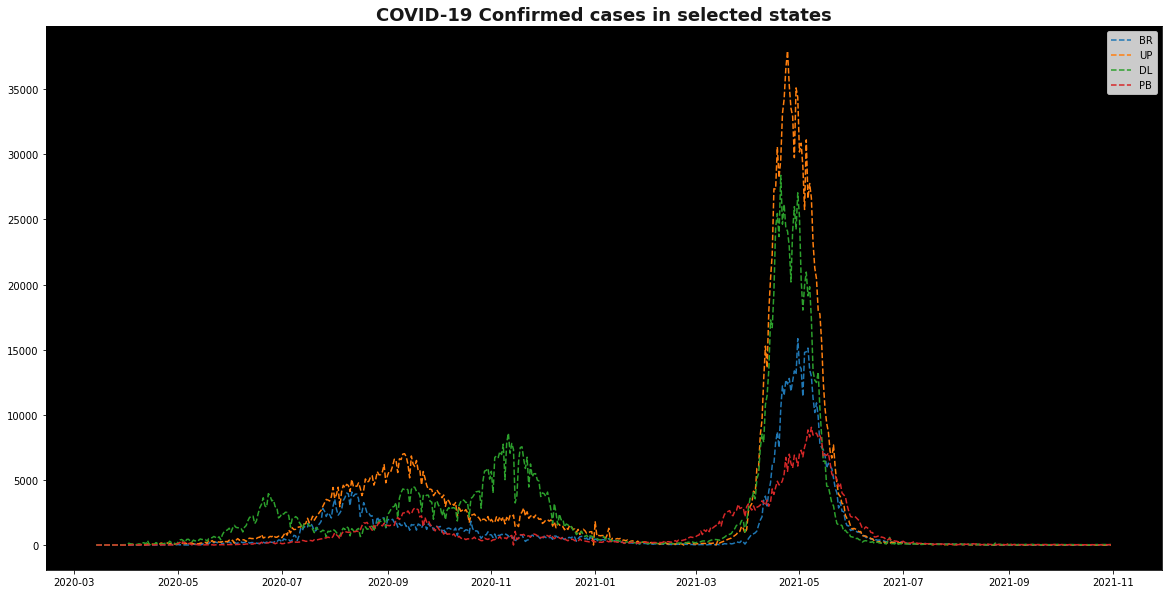

In [28]:
x = state_data_confirmed_daily.index
plt.figure(figsize=(20,10))
ax9 = plt.axes()
for y in states:
    ax9.plot(x, state_data_confirmed_daily[y],linestyle='dashed' , label = y)

ax9.set_facecolor("black")
plt.title('COVID-19 Confirmed cases in selected states', fontsize=18, weight='bold', alpha=0.9)
plt.legend()
plt.show()

In [18]:
state_data_confirmed_total = state_data.iloc[::3,2:].sum(axis=0)

In [29]:
state_data_confirmed_total.head()

TT    34284758
AN        7647
AP     2066450
AR       55156
AS      610543
dtype: int64

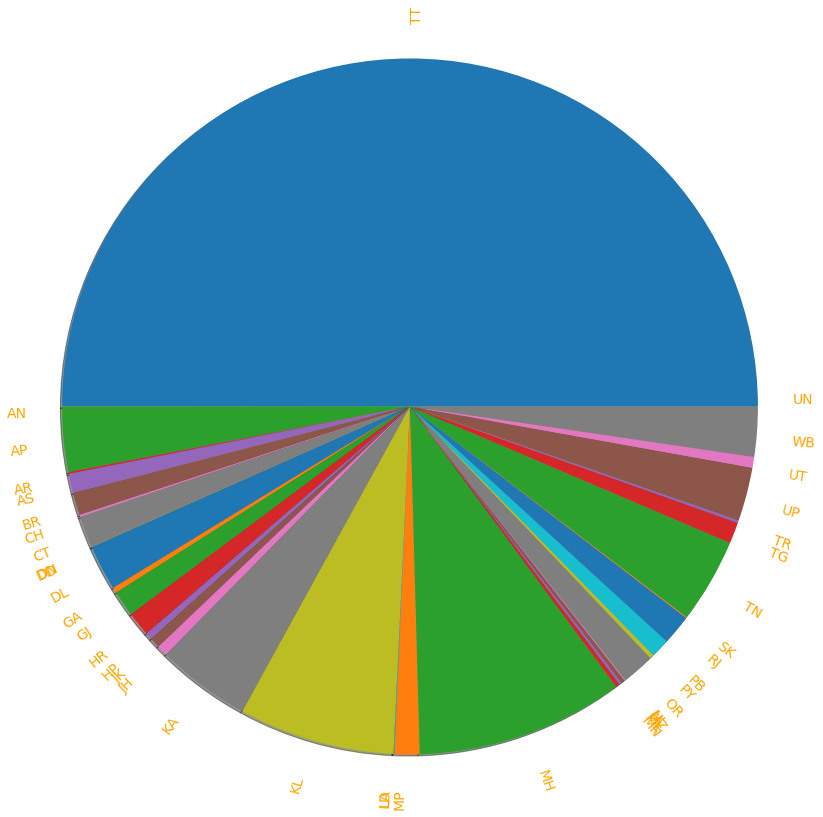

In [20]:

plt.pie(state_data_confirmed_total, labels=state_data.columns.values.tolist()[2:],textprops=dict(size=14,color='orange'), rotatelabels=True, radius=4, shadow=True)
plt.show()